# Visualizacion de datos con ggplot2

R posee gran variedad de paquetes que permiten desarrollar gráficas, no obstante **ggplot2** es uno de los mas elegantes y versatiles, algo importante para resaltar es que ggplot2 es compatible con las librerias de tidyverse y por tanto se puede cargar, transformar y visualizar datos con solo importar $library (tidyverse)$ en la consola de R.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Veamos un ejemplo del dataset de mpg

El dataset de mgp es una tabla rectangular que contiene las observaciones de la Agencia de Proteccion del Ambiente de USA, veamos

In [4]:
str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


De las anteriores variables, nos interesan:

1. dipl: Tamano del motor en Litros
2. hwy: eficiencia del motor en millas por galon

Veamos una grafica utilizando ggplot2:

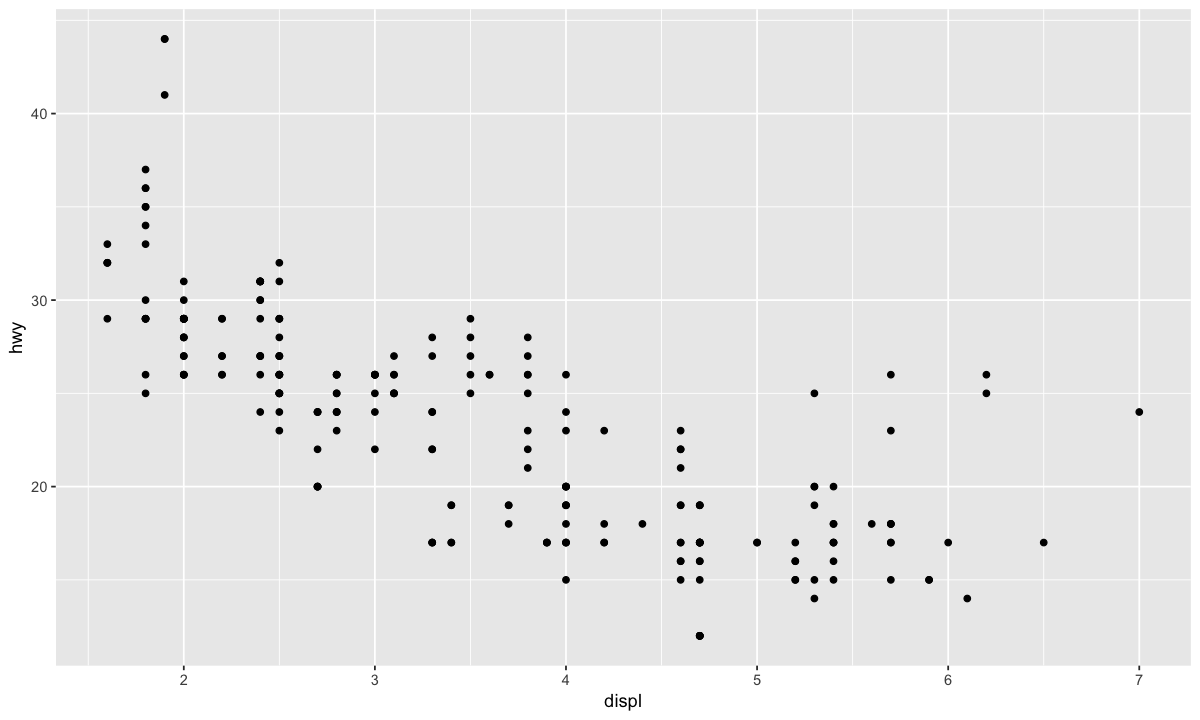

In [6]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = mpg)+                               #inicia con el dataset que va a ser graficado
    geom_point(mapping = aes(x = displ, y = hwy)) #Se agrega una capa de puntos
                                                  #Dentro de aes se indican todos los parametros de la capa a graficar

Se puede concluir que los datos presentan una relacion lineal negativa, esto es a medida que un motor aumenta su tamaño en litros, se disminuye su eficiencia.


# En general podemos definir que ggplot grafica asi:

$ggplot(data = <df>,
<GEOM\_FUNCTION>(mapping = aes (<EJES>)$

# Agregar una tercera variable a un grafico en 2D

Generalmente para referenciar una tercera variable en un grafico de dos dimensiones, se utiliza color, veamos como se implementa en ggplot2:

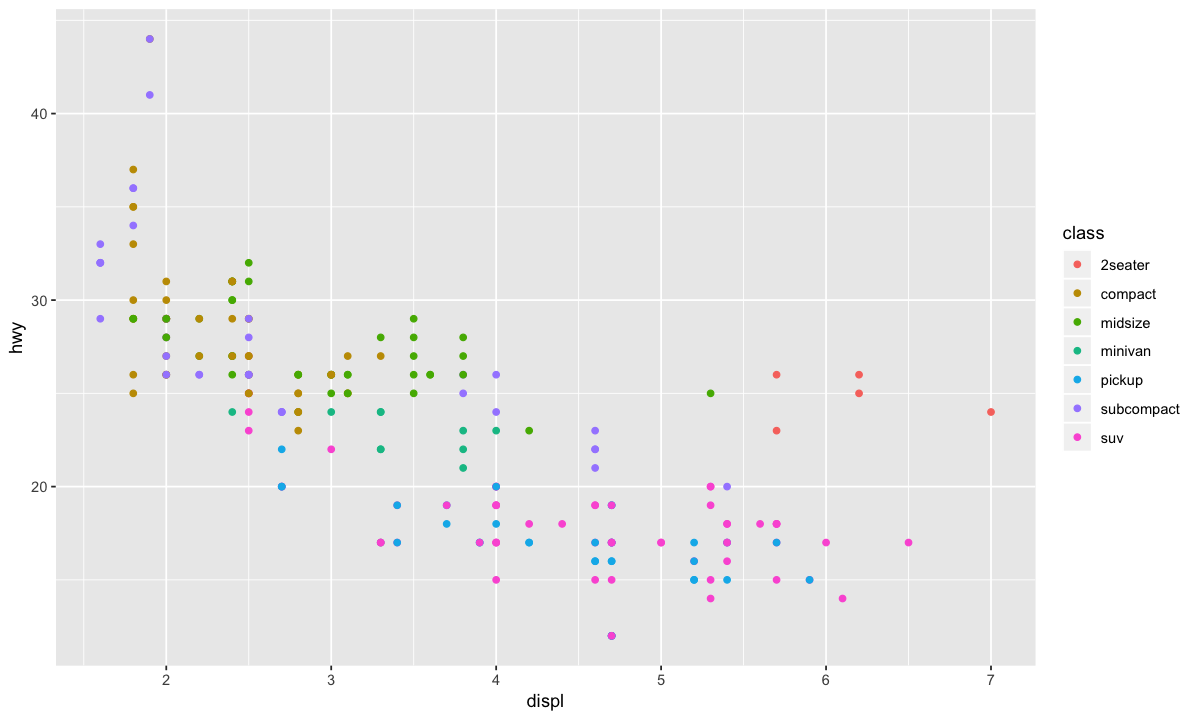

In [9]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = mpg)+                               
    geom_point(mapping = aes(x = displ, y = hwy, color=class))

ggplot automaticamente asigna un set de colores para graficar una tercera caracteristica sobre los datos y agrega la respectiva leyenda

# Otra forma de agregar una tercera variable
1. Se puede agregar una variable utilizando el **tamano**
2. Se puede agregar una variable utilizando el **transparencia**
3. Se puede agregar una variable utilizando el **forma**
4. Se puede agregar una variable utilizando el **colores manualmente**

Warning message:
“Using size for a discrete variable is not advised.”

Warning message:
“Using alpha for a discrete variable is not advised.”

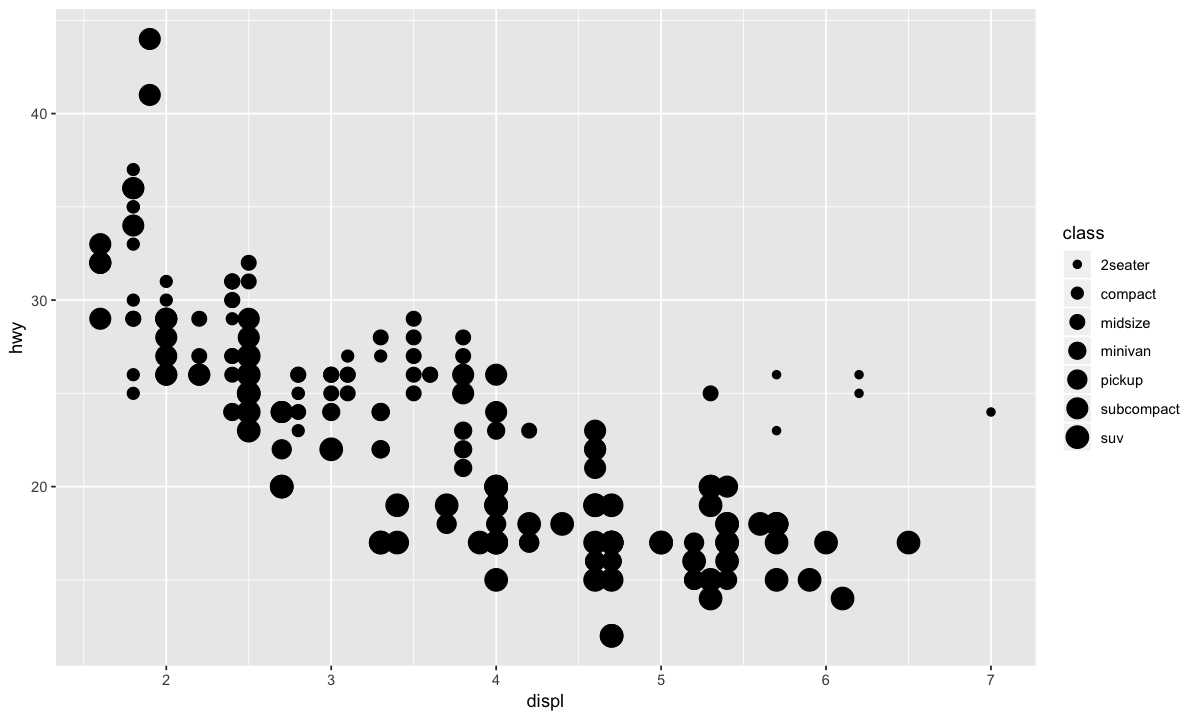

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

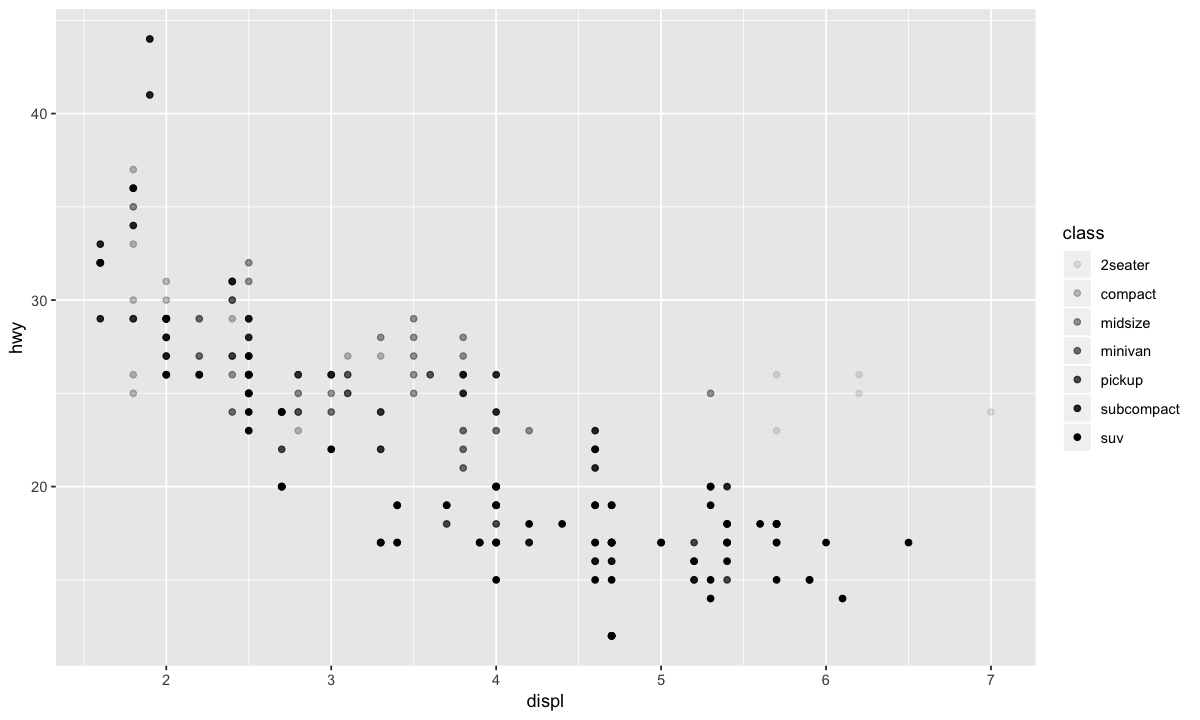

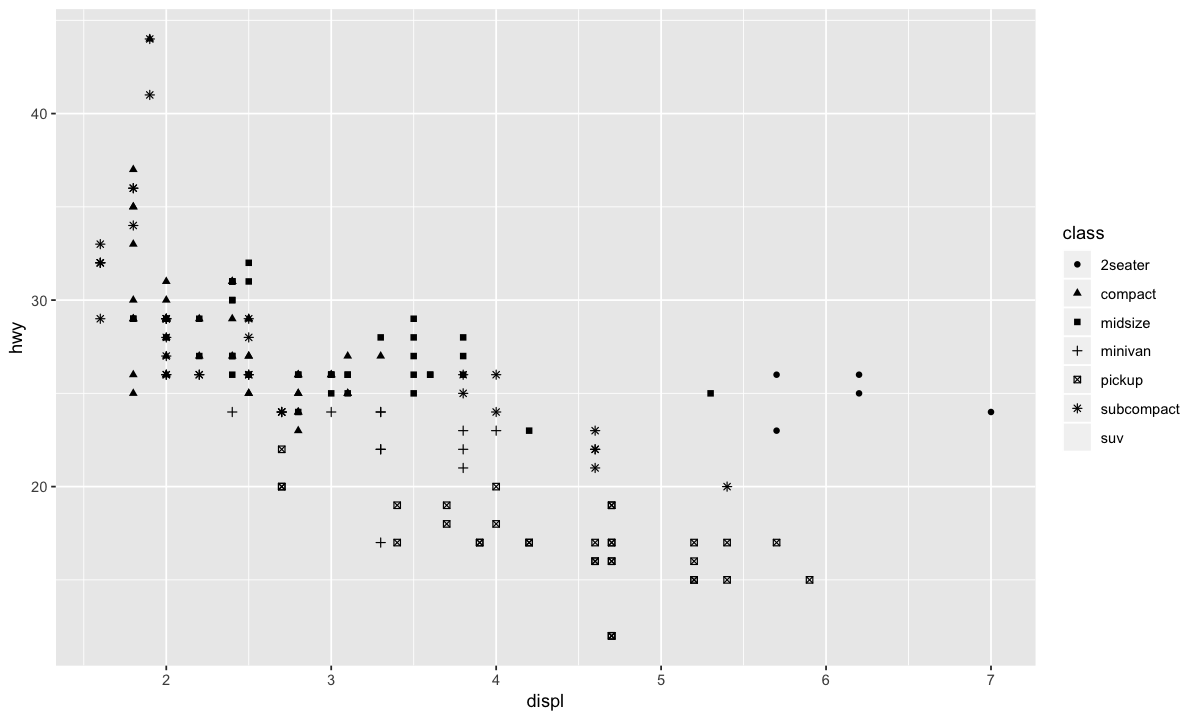

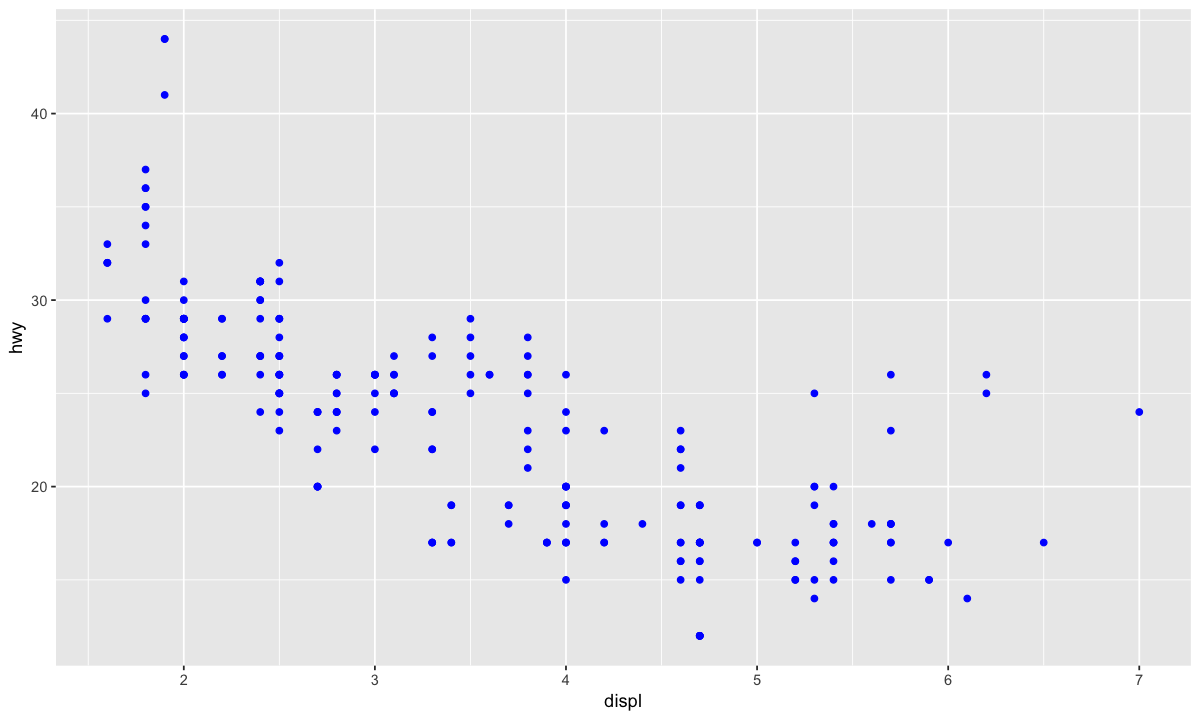

In [14]:
#tamano
ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, size = class))

#transparencia
ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

#forma
ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy, shape = class))

#manualmente
ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy), color = 'blue')

# Facets

Sirven para divir el area del grafico, como lo vimos con la funcion pairs

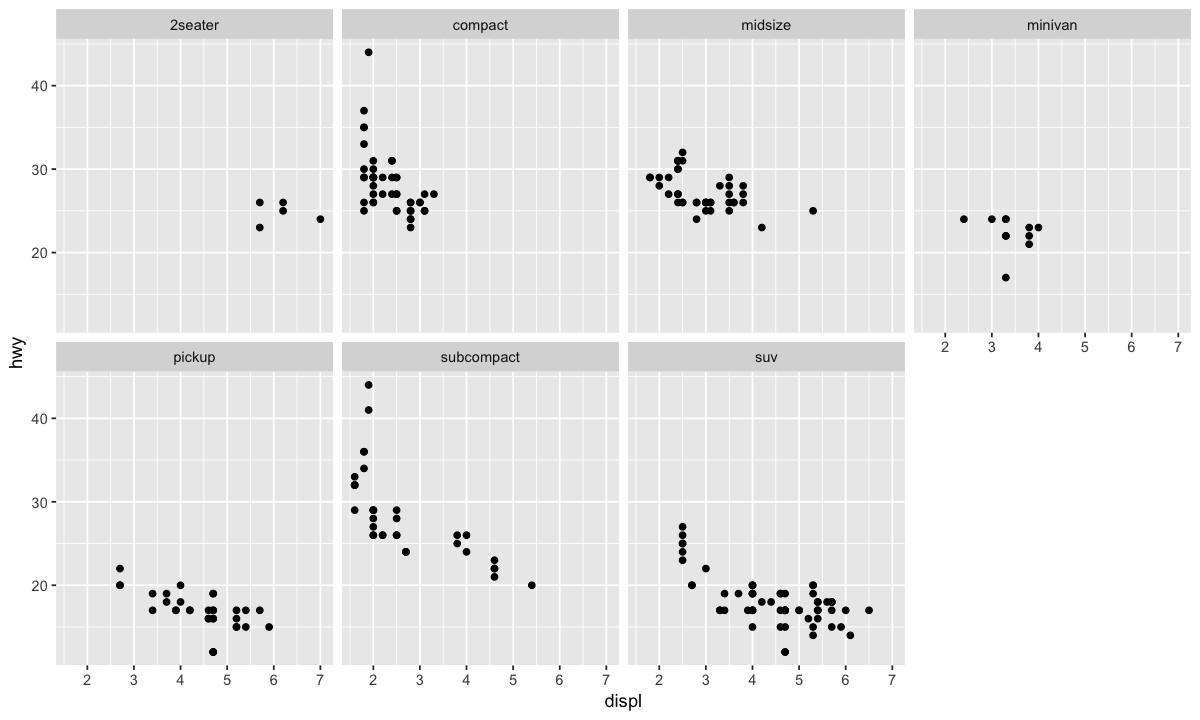

In [15]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = displ, y = hwy))+
        facet_wrap(~class, nrow = 2)

Division en dos variables:

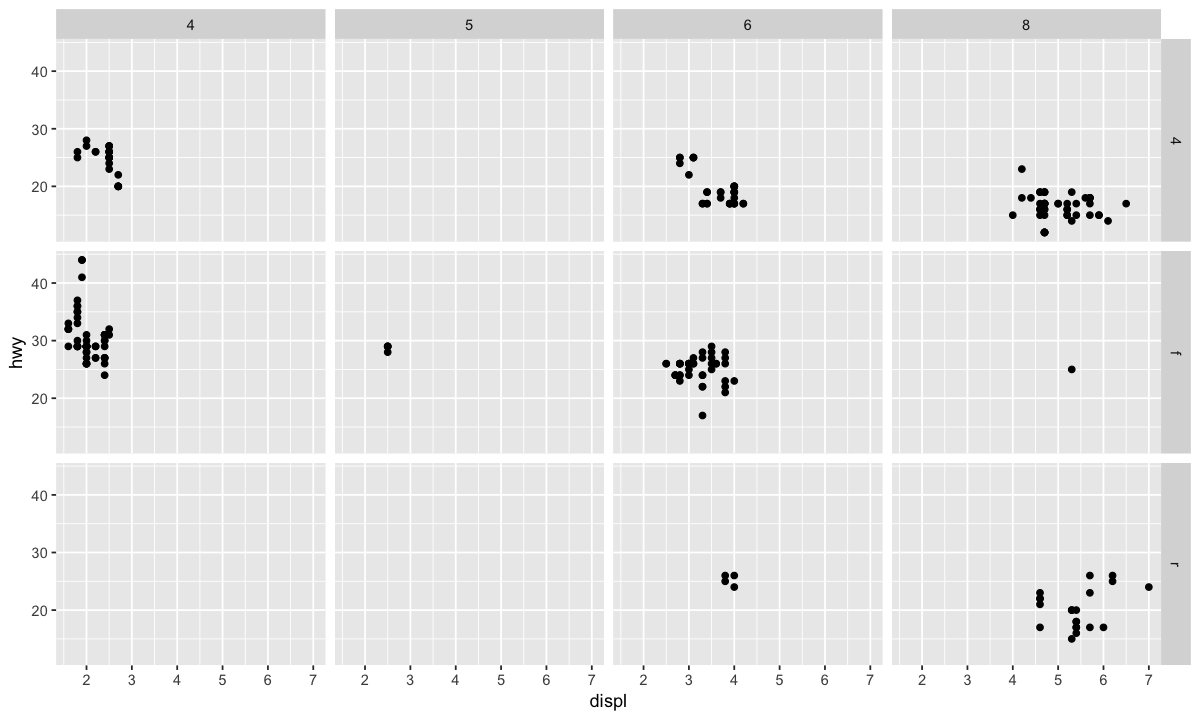

In [16]:
    ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      facet_grid(drv ~ cyl)

# Objetos geometricos

En general, se pueden contruir diferentes tipos de graficos utilizando ggplot. En este caso siempre iniciaremos con la palabra $geom_$ + el tipo de figura que se desea imprimir. 

Se debe considerar que dentro de $aes()$ no necesariamente van siempre los mismos parametros. Por ejemplo, no tiene sentido cobfigurar $shape$ a una linea

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


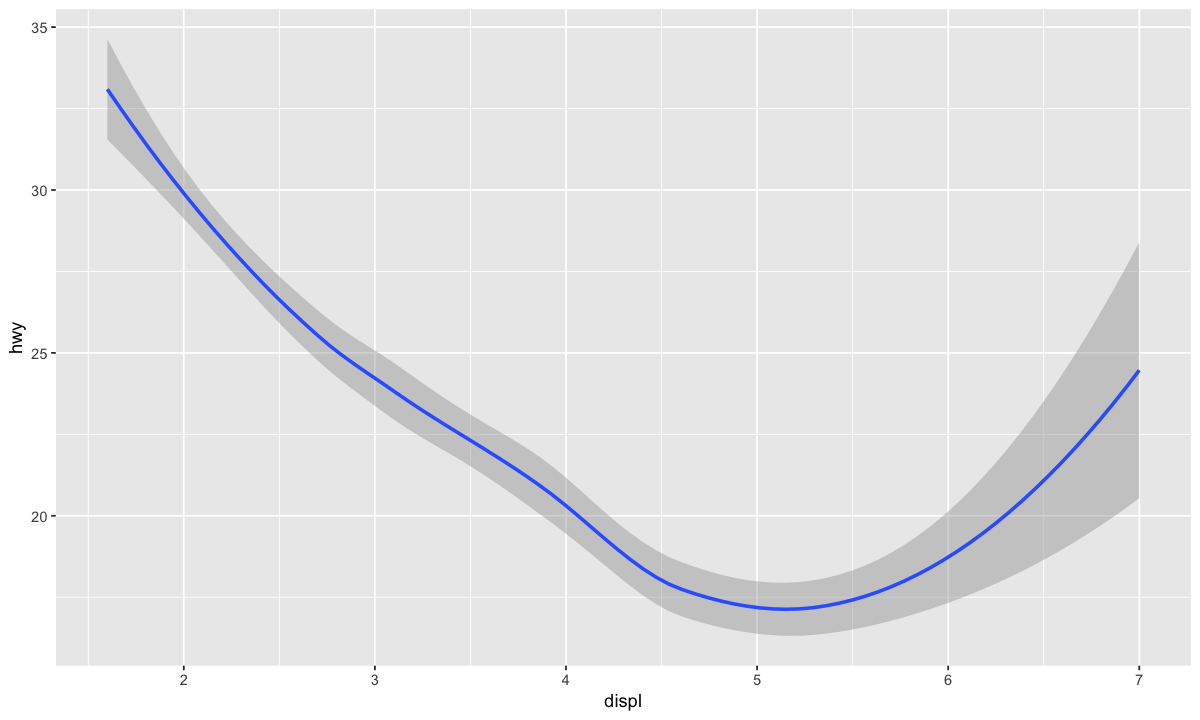

In [18]:
#Linea suavizada y su desviacion estandar 
ggplot(data = mpg) +
      geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


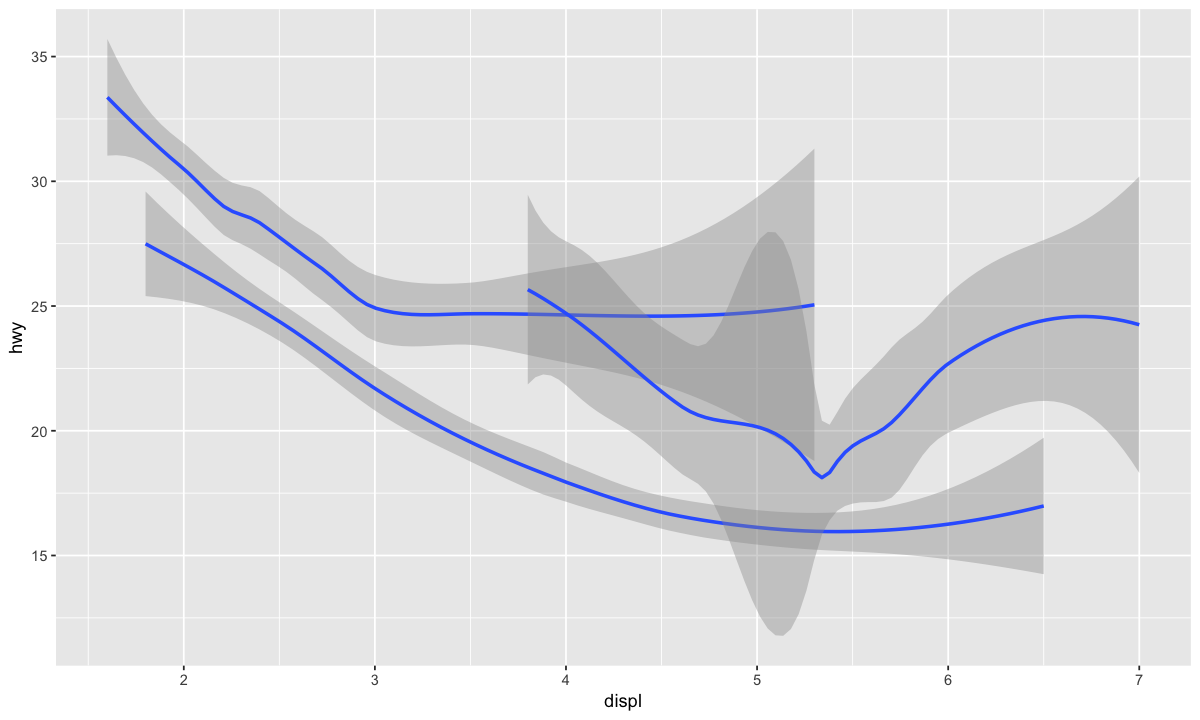

In [19]:
# linea suavizada agupada por hwy

ggplot(data = mpg) +
      geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

Otra forma de agregar informacion al grafico

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


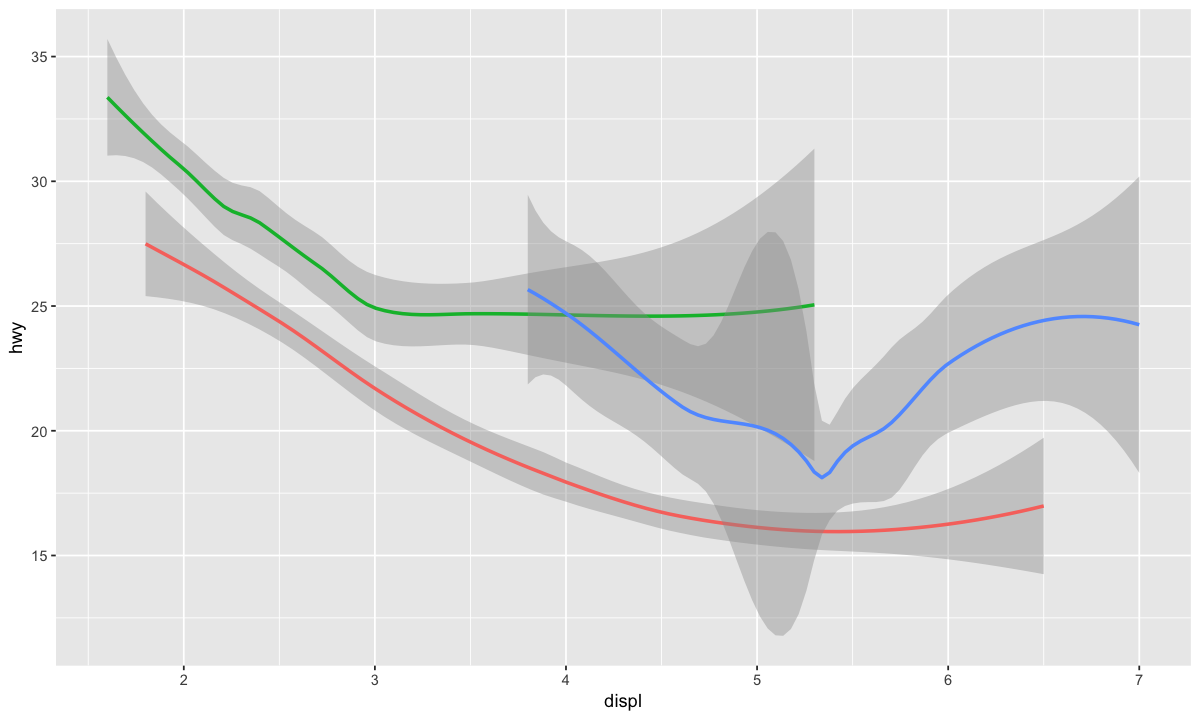

In [20]:
  ggplot(data = mpg) +
      geom_smooth(
        mapping = aes(x = displ, y = hwy, color = drv),
show.legend = FALSE )

# Unificar varios graficos en una misma area de grafico


Como ya se mencionó anteriormente, se pueden crear varias capas con graficos diferentes para enriquecer el resultado, esto es puntos, lineas, entre otros. Veamos

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


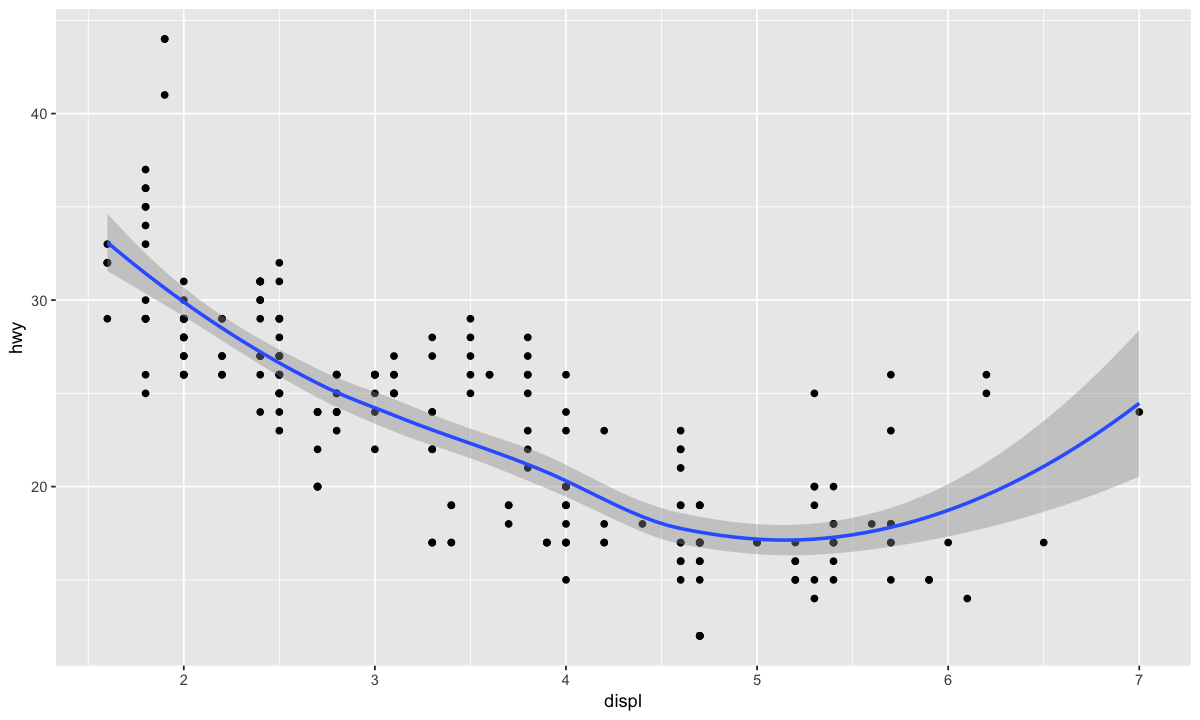

In [21]:
ggplot(data = mpg) +
      geom_point(mapping = aes(x = displ, y = hwy)) +
      geom_smooth(mapping = aes(x = displ, y = hwy))

# El anterior codigo es demasiado repetitivo, veamos como simplificar el codigo:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


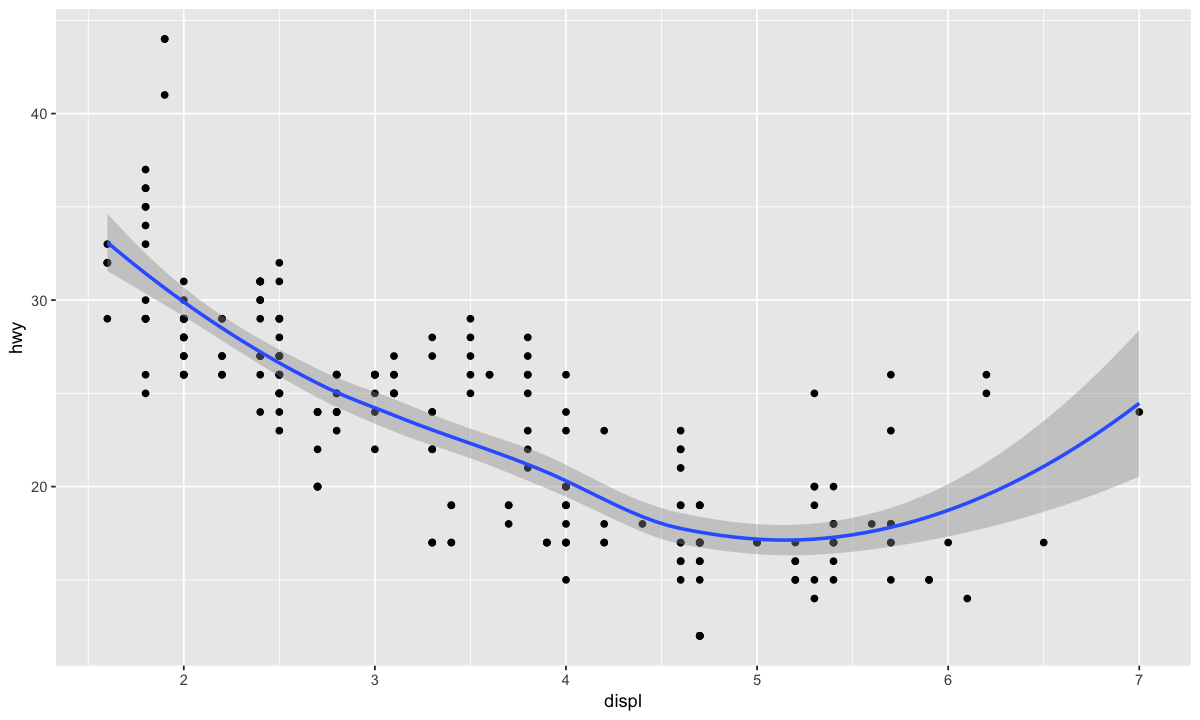

In [22]:
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
      geom_point() +
      geom_smooth()

# No obstante, si se desea configurar un parametro solo a una de las capas:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


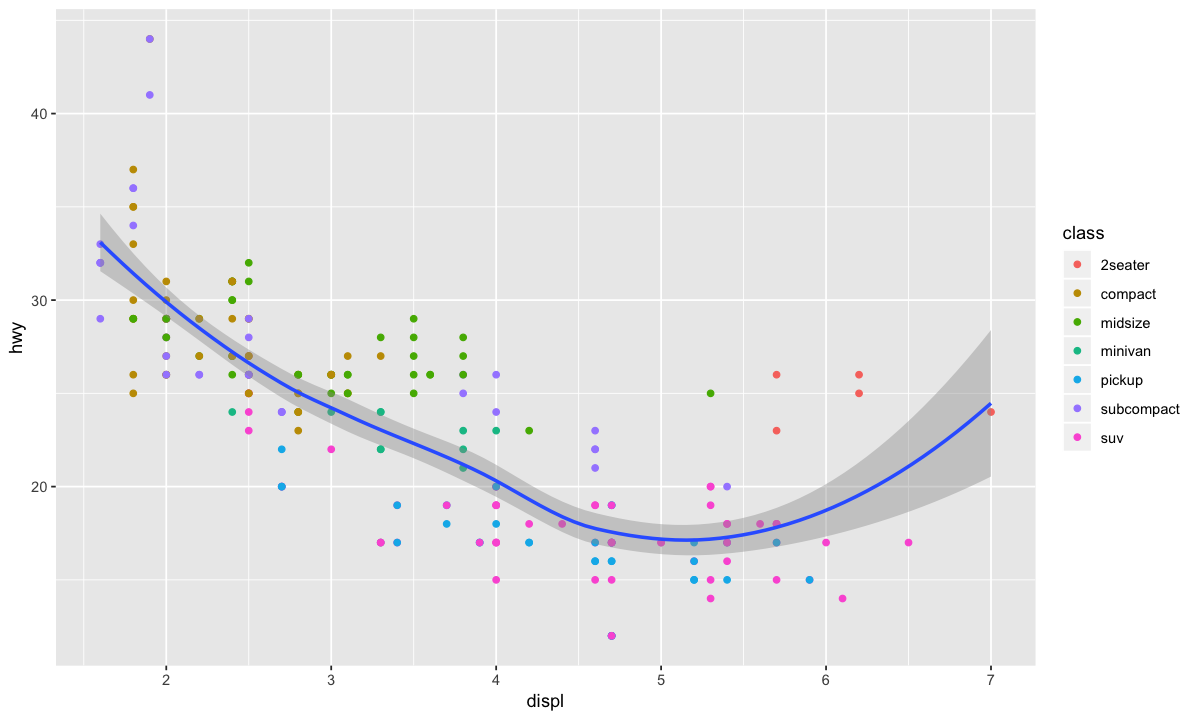

In [23]:
    ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
      geom_point(mapping = aes(color = class)) +
      geom_smooth()

# Tambien se puede definir los datos que deben ser graficados en cada capa

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


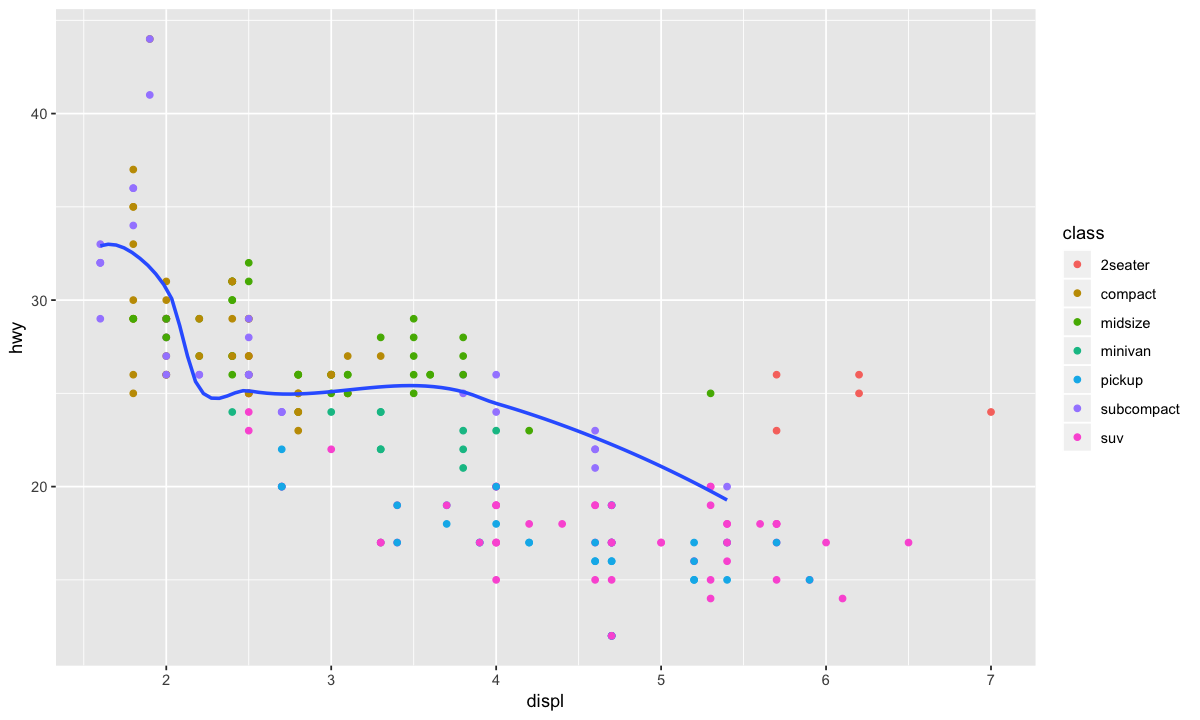

In [25]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth(
    data = filter(mpg, class == "subcompact"),
se = FALSE )

# Transformaciones estadisticas

Veamos como construir graficos de barras con informacion relevante, para este grafico se utiliza $geom_bar()$. Para esta seccion trabajaremos con el dataset $diamonds$ que contiene informacion de aproximadamente 54.000 diamantes incluyendo precio, quilates, color, pureza y corte, veamos:  

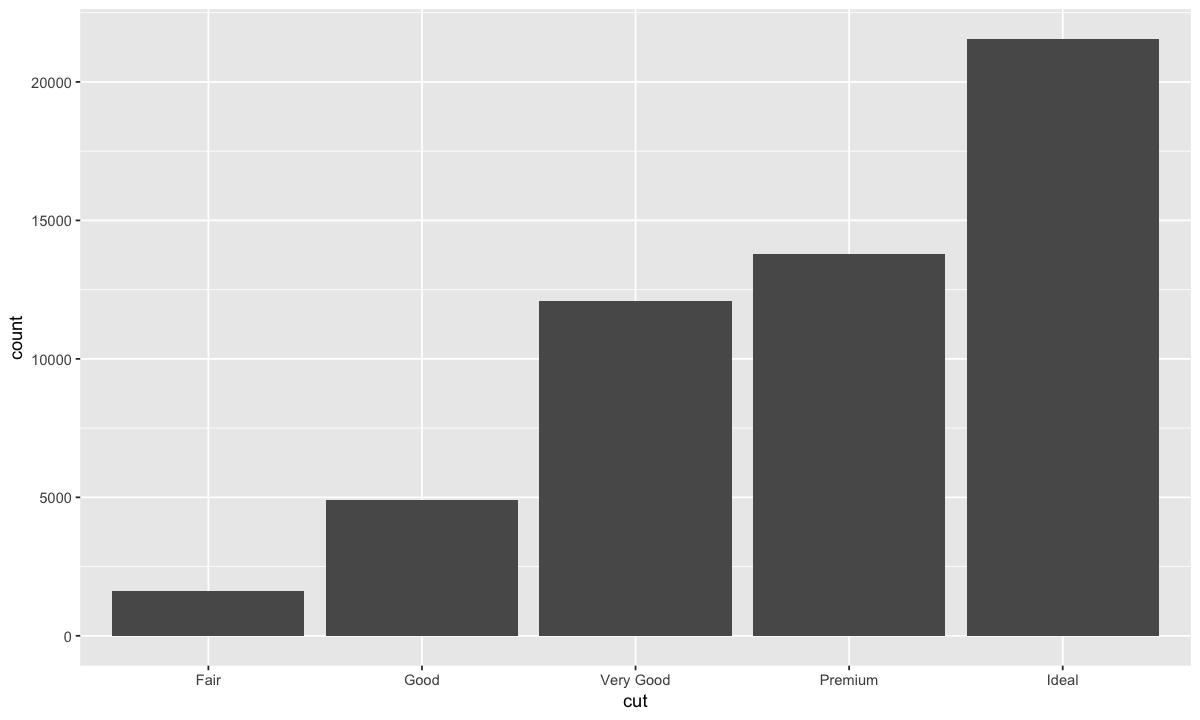

In [27]:
ggplot(diamonds)+
geom_bar(mapping = aes(x=cut)) # Solo se debe definir eje X

# Ajustes de posicion

Tambien se pueden colorear los graficos de barras con $Color$ o $fill$

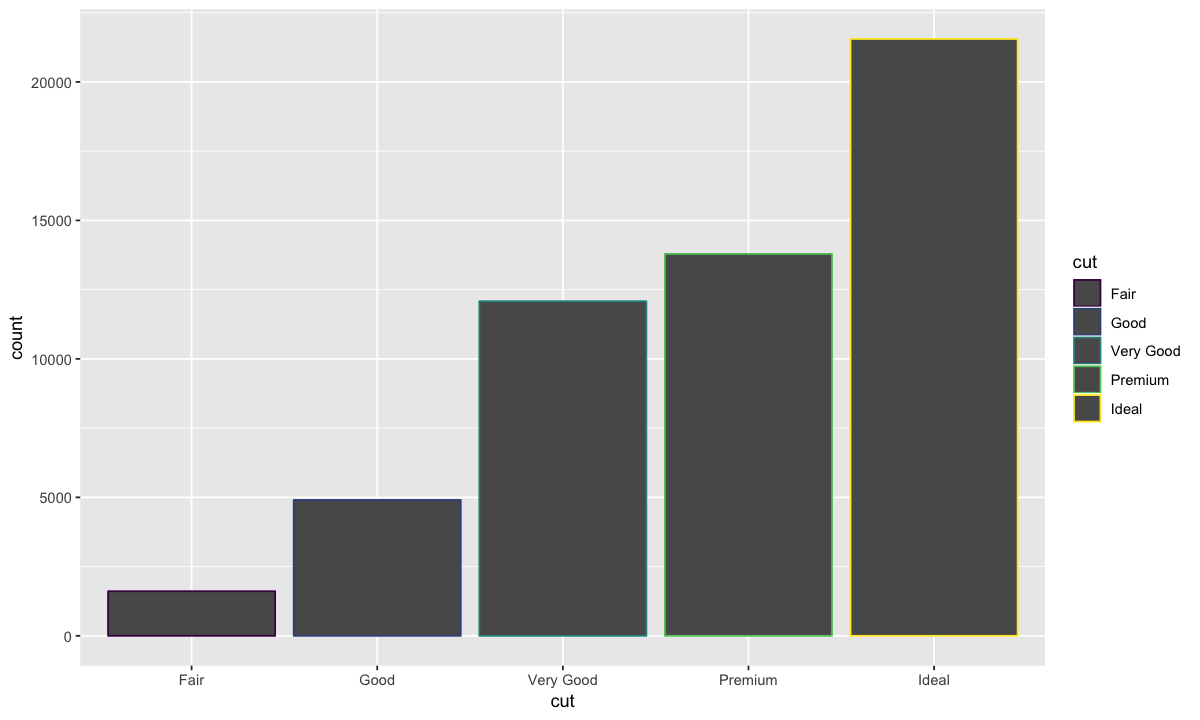

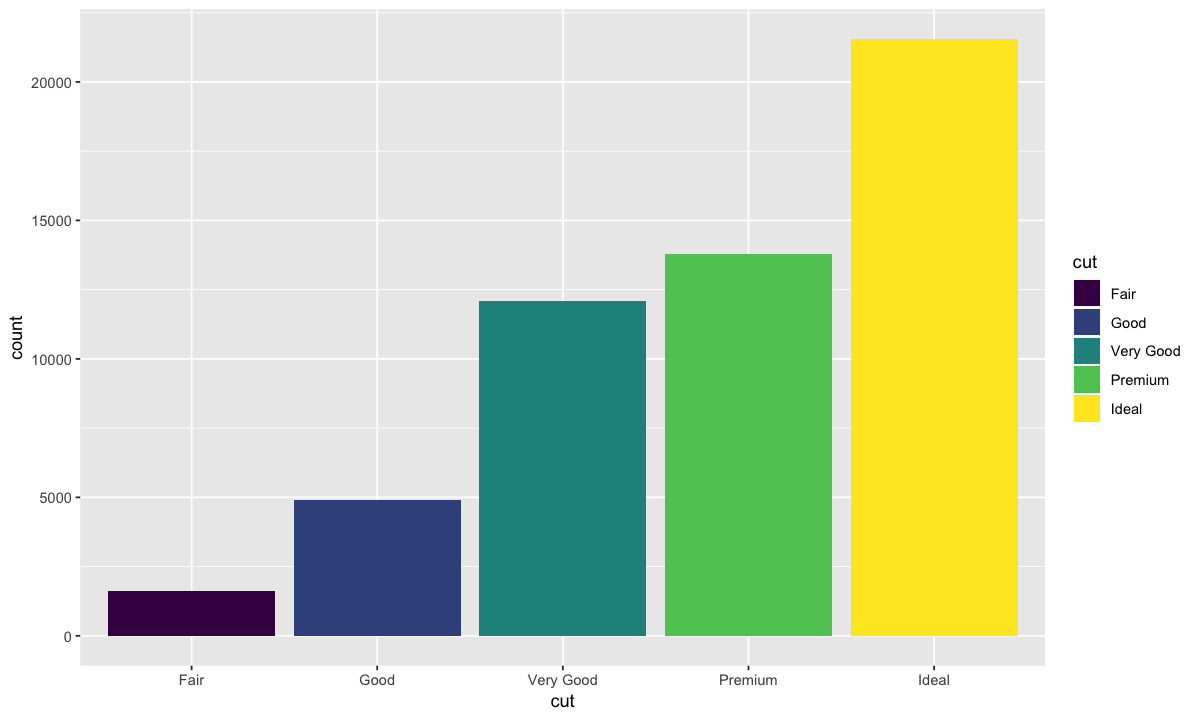

In [28]:
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, color = cut))
    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, fill = cut))

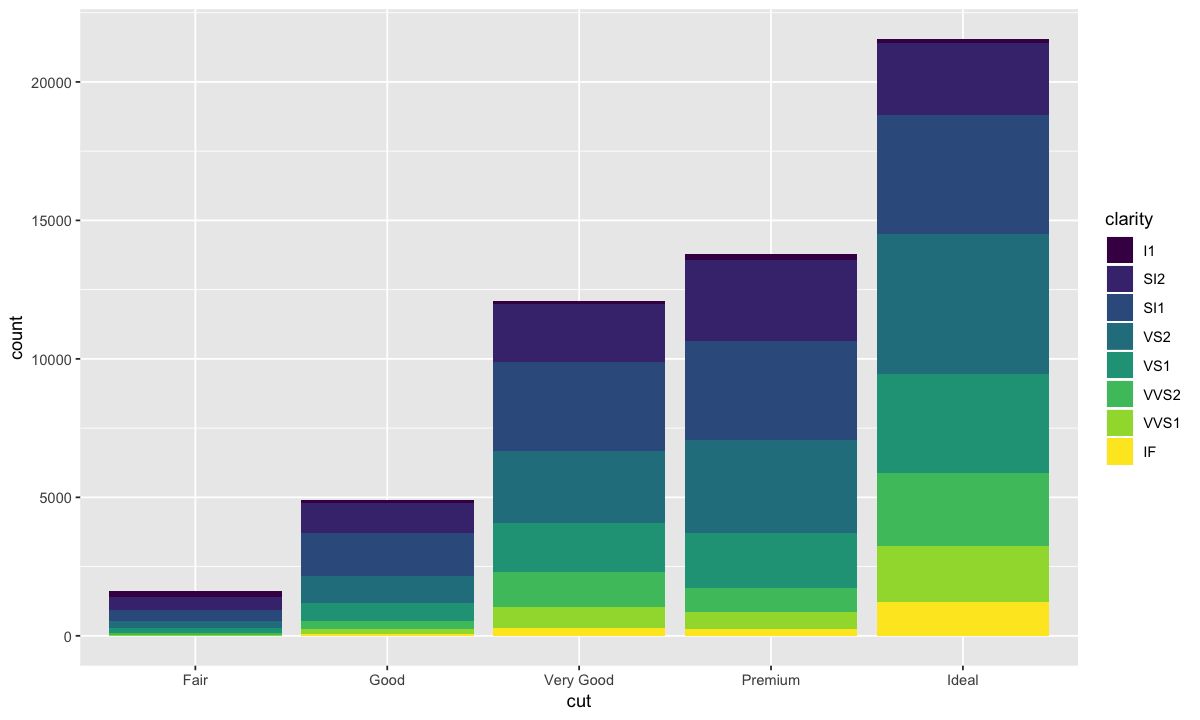

In [29]:

    ggplot(data = diamonds) +
      geom_bar(mapping = aes(x = cut, fill = clarity))

# Dependiendo del grafico se puede emplear los siguientes parametros:

+ position = "identity" Reemplazara cada objeto exactamente donde el caiga en el contexto de la grafica


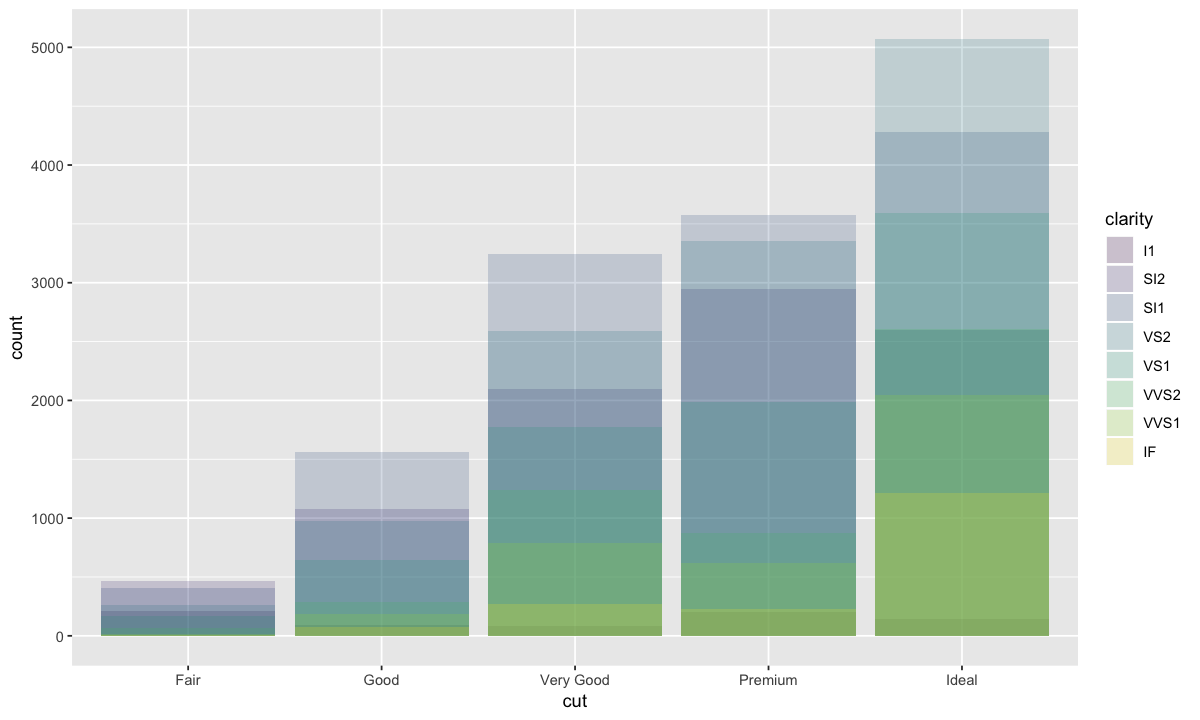

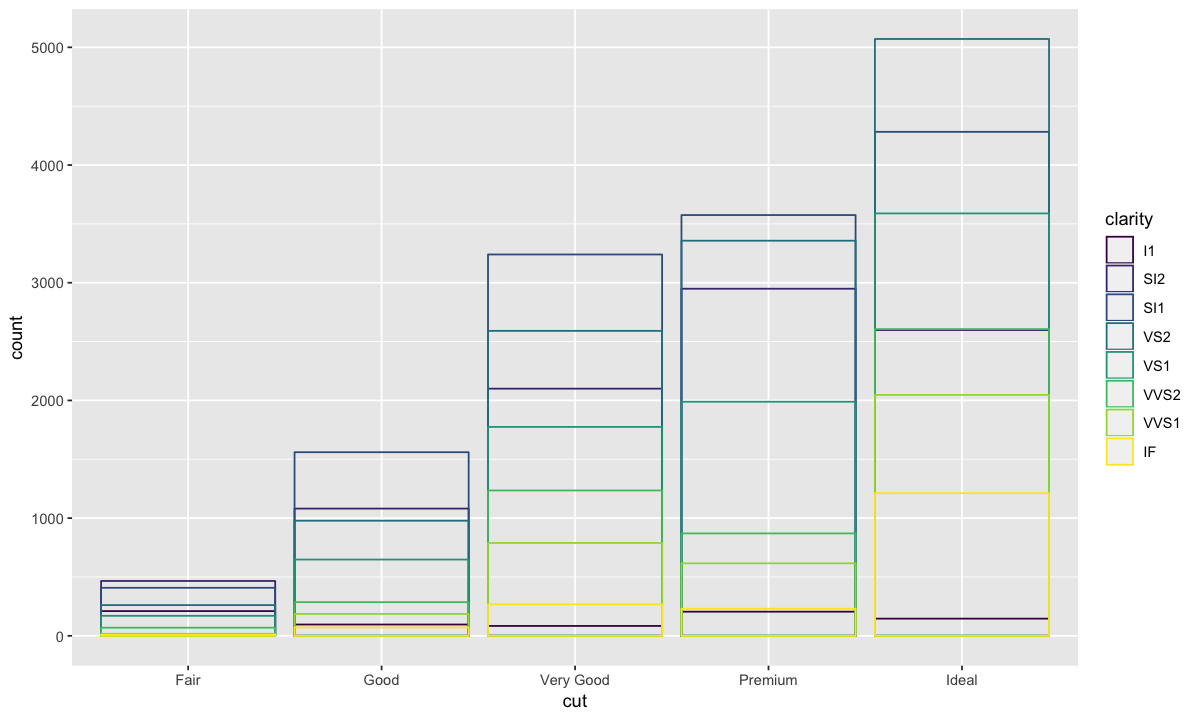

In [30]:
ggplot(
      data = diamonds,
      mapping = aes(x = cut, fill = clarity)) +  
geom_bar(alpha = 1/5, 
         position = "identity")


ggplot(          data = diamonds,
          mapping = aes(x = cut, color = clarity))+
geom_bar(fill = NA, position = "identity")

+ potition = "fill" creara barras del mismo tamano y el mismo peso. Permite comparar proporciones


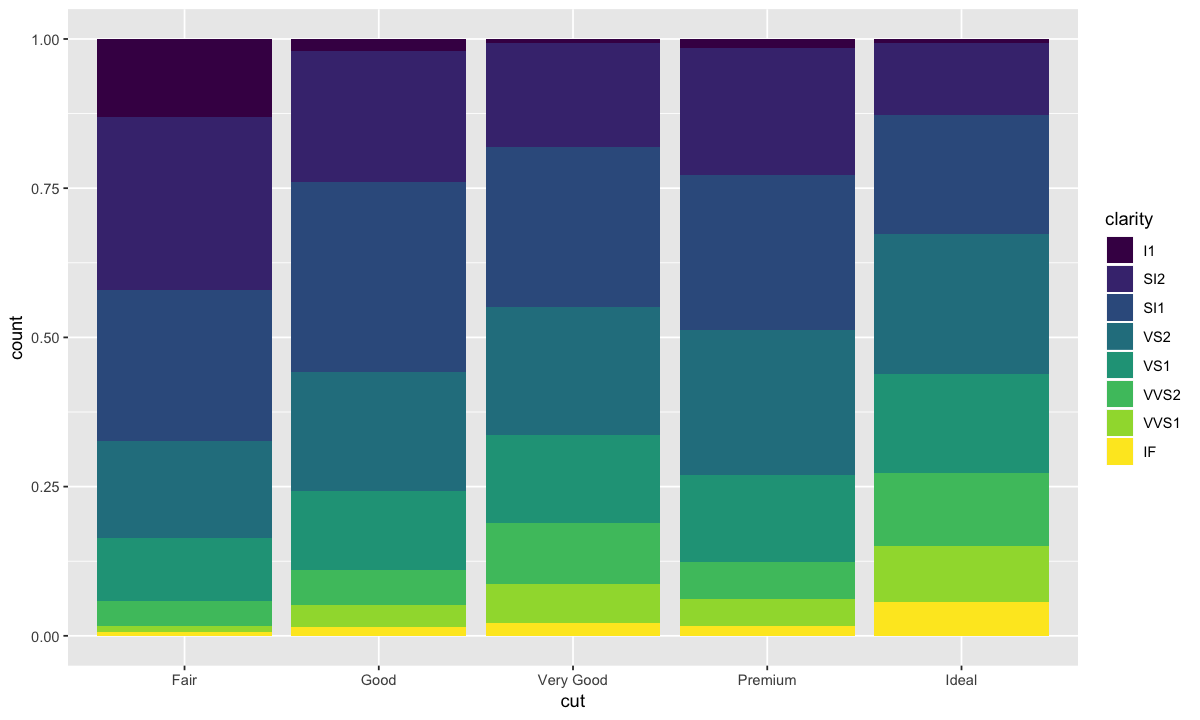

In [31]:
ggplot(data = diamonds) +
  geom_bar(
    mapping = aes(x = cut, fill = clarity),
    position = "fill"
  )


+ potition = "dodge": imprime datos de la misma categoria y permite comparar valores uno a uno 

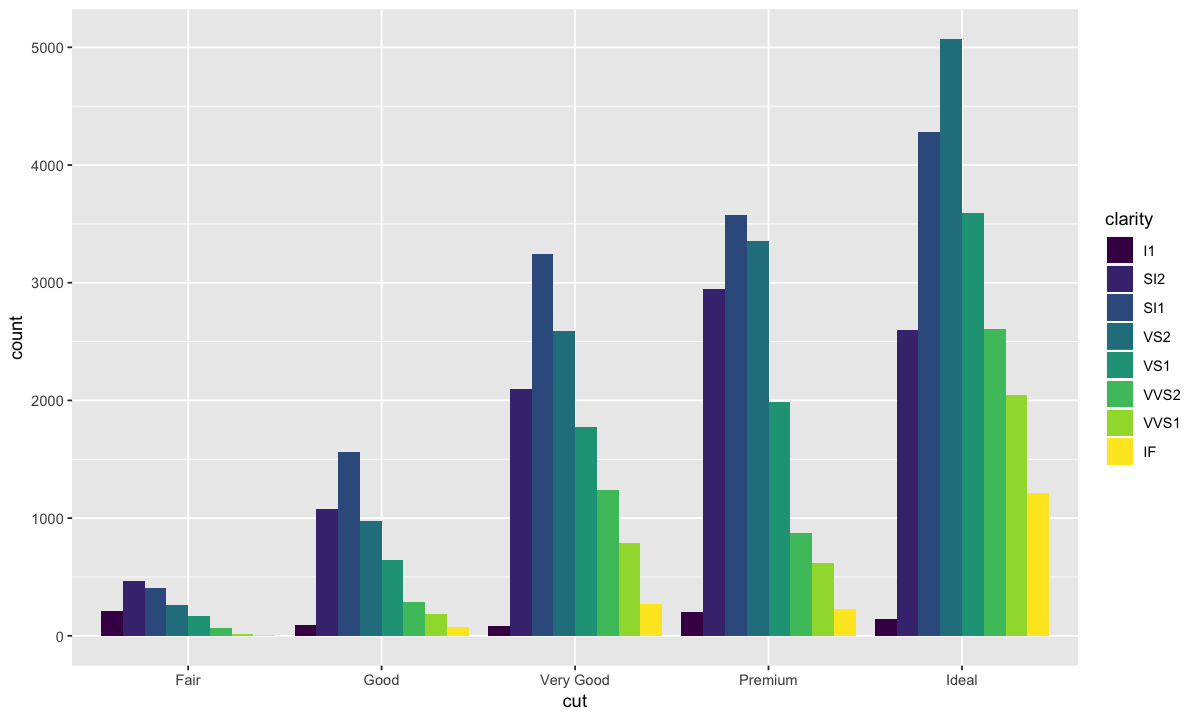

In [32]:
   ggplot(data = diamonds) +
          geom_bar(
            mapping = aes(x = cut, fill = clarity),
            position = "dodge"
          )

# Ejercicio Repaso de dplyr y ggplot2

[link del ejercicio ](https://rpubs.com/LexyBrooks/Flight-Explore)

La libreria nycflights13 posee los datos de vuelos realizados desde y hacia el aeropuerto de Nueva York

A continuacion algunas preguntas para responder y graficar:

1. ¿Cuantos vuelos se realizan en total cada mes?

